# Decision Trees

© Data Trainers LLC. GPL v 3.0.

Author: Axel Sirota

<a id="refresher-fitting-and-visualizing-a-linear-regression-using-scikit-learn"></a>
## Using the glass Dataset
---

Use Pandas to load in the glass attribute data from the UCI machine learning website. The columns are different measurements of properties of glass that can be used to identify the glass type. For detailed information on the columns in this data set: http://archive.ics.uci.edu/ml/datasets/glass+identification

In [1]:
# Glass identification data set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, model_selection, metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:

%%writefile get_data.sh
mkdir -p data
if [ ! -f data/admissions.csv ]; then
  wget -O data/admissions.csv https://www.dropbox.com/scl/fi/bjcutl89xibf3r99yc8q0/admissions.csv?rlkey=n36lo0iffob0j73rys1vf3cn5&dl=0
fi
if [ ! -f data/bank.csv ]; then
  wget -O data/bank.csv https://www.dropbox.com/scl/fi/ukxqbfalj3rx5nyzven9j/bank.csv?rlkey=hfrax97bwt45dq9ag0jdpsgsp&dl=0
fi
if [ ! -f data/churn_missing.csv ]; then
  wget -O data/churn_missing.csv https://www.dropbox.com/scl/fi/rab18zeo6bq58fz1tadwc/churn_missing.csv?rlkey=32tcp05gaj8rgnpc76vh2dbca&dl=0
fi
if [ ! -f data/evergreen_sites.tsv ]; then
  wget -O data/evergreen_sites.tsv https://www.dropbox.com/scl/fi/c310bmln3pv8vdlbweo1k/evergreen_sites.tsv?rlkey=kie6jqkr4klw26b9gnowinyd9&dl=0
fi
if [ ! -f data/glass.csv ]; then
  wget -O data/glass.csv https://www.dropbox.com/scl/fi/dv522a61am4dsc3vkfp4p/glass.csv?rlkey=6l9v685sw98plzj2myvtjpes6&dl=0
fi
if [ ! -f data/titanic.csv ]; then
  wget -O data/titanic.csv https://www.dropbox.com/scl/fi/csnl3vpbq94i4vxpfoe2w/titanic.csv?rlkey=6q576c7lp0e25tb5khvz066l9&dl=0
fi

Writing get_data.sh


In [3]:
!bash get_data.sh

--2024-04-25 14:19:43--  https://www.dropbox.com/scl/fi/dv522a61am4dsc3vkfp4p/glass.csv?rlkey=6l9v685sw98plzj2myvtjpes6
--2024-04-25 14:19:43--  https://www.dropbox.com/scl/fi/bjcutl89xibf3r99yc8q0/admissions.csv?rlkey=n36lo0iffob0j73rys1vf3cn5
--2024-04-25 14:19:43--  https://www.dropbox.com/scl/fi/c310bmln3pv8vdlbweo1k/evergreen_sites.tsv?rlkey=kie6jqkr4klw26b9gnowinyd9
--2024-04-25 14:19:43--  https://www.dropbox.com/scl/fi/csnl3vpbq94i4vxpfoe2w/titanic.csv?rlkey=6q576c7lp0e25tb5khvz066l9
--2024-04-25 14:19:43--  https://www.dropbox.com/scl/fi/rab18zeo6bq58fz1tadwc/churn_missing.csv?rlkey=32tcp05gaj8rgnpc76vh2dbca
--2024-04-25 14:19:43--  https://www.dropbox.com/scl/fi/ukxqbfalj3rx5nyzven9j/bank.csv?rlkey=hfrax97bwt45dq9ag0jdpsgsp
Resolving www.dropbox.com (www.dropbox.com)... Resolving www.dropbox.com (www.dropbox.com)... Resolving www.dropbox.com (www.dropbox.com)... Resolving www.dropbox.com (www.dropbox.com)... Resolving www.dropbox.com (www.dropbox.com)... Resolving www.dropbox

In [4]:
glass = pd.read_csv('data/glass.csv')

In [5]:
# change columns to something more uniform
glass.columns = ['ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass.head(3)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [6]:
# Types 1, 2, 3 are window glass.
# Types 5, 6, 7 are household glass.
glass['household'] = glass.glass_type.apply(lambda x : x//4)
glass.tail()


,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7,1
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7,1
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7,1
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7,1
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7,1


In [7]:
glass.household.unique()

array([0, 1])

In [8]:
glass.household.value_counts()

household
0    163
1     51
Name: count, dtype: int64

Text(0, 0.5, 'household')

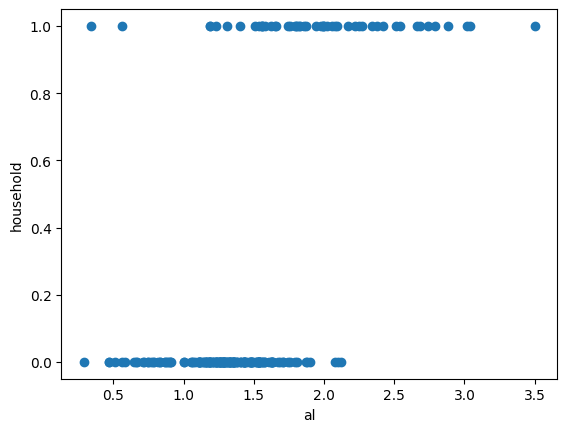

In [9]:
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household')

## Can we create a non-linear classifier?

Check this page: http://www.r2d3.us/visual-intro-to-machine-learning-part-1/ and http://www.r2d3.us/visual-intro-to-machine-learning-part-2

- Here they construct decision trees to solve this non-linear problem using multiple features.

# Lets build a Tree to classify

<img src="https://www.dropbox.com/scl/fi/z6xbyrn4phkxcr4ca1qyd/tree.jpg?rlkey=we02at2ie3dmnssyxtiadw7yv&raw=1"  align="center"/>

In [10]:
glass.head(2)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0


In [11]:
X = glass[['na','fe','al','k']]
y = glass.household
X.head()

,na,fe,al,k
0,13.64,0.0,1.10,0.06
1,13.89,0.0,1.36,0.48
2,13.53,0.0,1.54,0.39
3,13.21,0.0,1.29,0.57
4,13.27,0.0,1.24,0.55


In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: household, dtype: int64

In [13]:
!pip install pydotplus

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# for vizualizing the tree
import pydotplus
from IPython.display import Image
from sklearn.model_selection import train_test_split
# Create decision tree classifer object
tree_model = DecisionTreeClassifier(random_state=0,max_depth=7)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

# logistic regression model fit
tree_model.fit(X_train,y_train)

# do prediction on test Data
y_pred=tree_model.predict(X_test)
print(y_pred)

# Calculate score
tree_model.score(X_test,y_test)

[1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0]


0.8372093023255814

In [15]:
X.columns.values

array(['na', 'fe', 'al', 'k'], dtype=object)

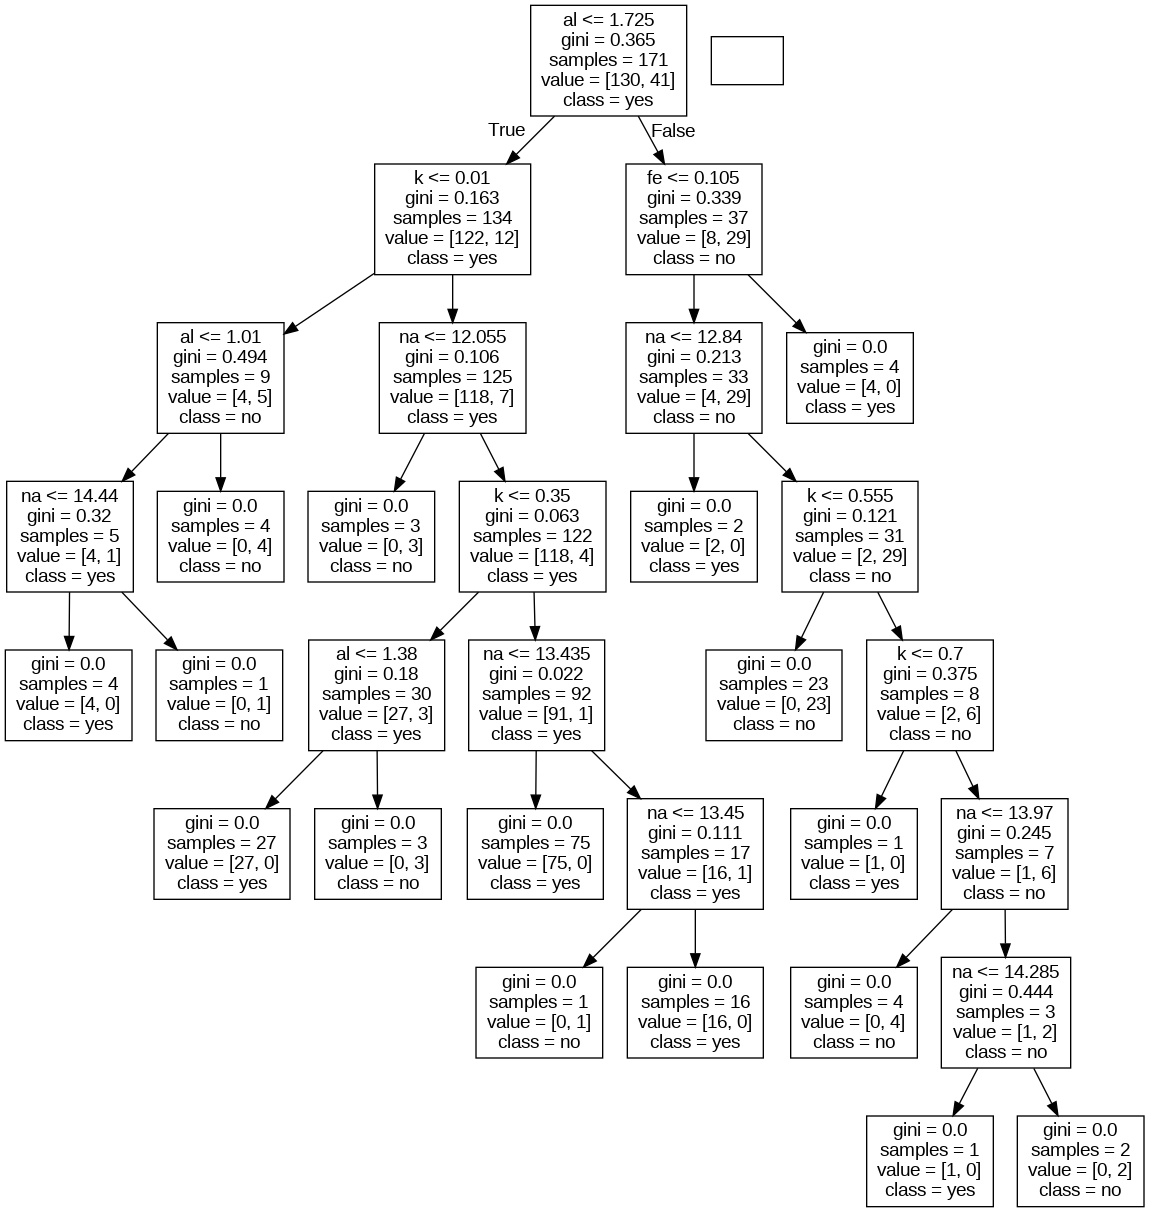

In [16]:
# Create DOT data
dot_data = tree.export_graphviz(tree_model, out_file=None,
                                feature_names=X.columns.values,
                                class_names=['yes','no'])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [17]:
metrics.confusion_matrix(y_test, y_pred)

array([[31,  2],
       [ 5,  5]])

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        33
           1       0.71      0.50      0.59        10

    accuracy                           0.84        43
   macro avg       0.79      0.72      0.74        43
weighted avg       0.83      0.84      0.83        43



## Try to tune the decision tree for optimal performance

Predicted who gets admitted or not?

>  test_size : 0.25   and random_state = 99

<img src="https://www.dropbox.com/scl/fi/qt7g1wgsnpne43cfwumu0/hands_on.jpg?rlkey=q1zyeuoiuvofnzux4iylfo6ax&raw=1" width="100" height="100" align="right"/>

In [19]:
# Your solution here

# Now you do it

Predicted who survives the titanic?

>  test_size : 0.25   and random_state = 99

<img src="https://www.dropbox.com/scl/fi/qt7g1wgsnpne43cfwumu0/hands_on.jpg?rlkey=q1zyeuoiuvofnzux4iylfo6ax&raw=1" width="100" height="100" align="right"/>

**Below we will load in some data on the titanic shipwreck.**

In [20]:
import pandas as pd
titanic = pd.read_csv('data/titanic.csv')
titanic.head()




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Random Forest
----
Dictatorship or diplomacy?

<img src="https://www.dropbox.com/scl/fi/agihb72fdl8yozz3k3an9/rf.jpg?rlkey=yxry1ud5m2obcm2sjhhfp49fj&raw=1"  align="center"/>

In [21]:
## Lets import RF
from sklearn.ensemble import RandomForestClassifier

In [22]:
X.head()

,na,fe,al,k
0,13.64,0.0,1.10,0.06
1,13.89,0.0,1.36,0.48
2,13.53,0.0,1.54,0.39
3,13.21,0.0,1.29,0.57
4,13.27,0.0,1.24,0.55


In [23]:
# Calculate testing error.
rf_model = RandomForestClassifier(n_estimators=20,max_depth=8, random_state=0)


rf_model.fit(X_train, y_train)

y_pred_class = rf_model.predict(X_test)
testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
print('the accuracy is: ',testing_accuracy)
testing_error = 1 - testing_accuracy

print('the error is: ',testing_error)

the accuracy is:  0.8837209302325582
the error is:  0.11627906976744184


# Now you do it
<img src="https://www.dropbox.com/scl/fi/s9kv1dytq4qzr8g19y3r0/hands_on.jpg?rlkey=yz8kq22sfdgc7lsgmm1e0fksr&raw=1" width="100" height="100" align="right"/>

The dataset is one on "churn" in cell phone plans. It has information on the usage of the phones by different account holders and whether or not they churned or not.

Our goal is to predict whether a user will churn or not based on the other features.

<img src="https://www.dropbox.com/scl/fi/r0di6ju7bm2pskg5nqd0n/churn.png?rlkey=xclo5ytlre63kb6o31sjub956&raw=1"  align="center"/>

### Use these parameters for testing

> random_state = 99

> test_size = 0.2

In [24]:
churn = pd.read_csv('./data/churn_missing.csv')
churn.head()

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn
0,KS,128,415,no,yes,25.0,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26.0,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0.0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0.0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0.0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [25]:
churn.shape

(3333, 20)

<Axes: >

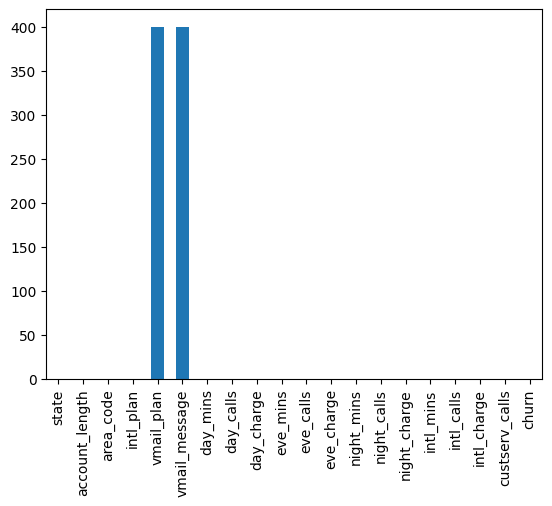

In [26]:
churn.isnull().sum().plot(kind='bar')

# Gradient Boosted Classification

The final way of performing classification with trees is via ensembling with boosting.

The best way is with an example, let's do a whiteboard!

In [45]:
titanic.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
feature_cols = ['Pclass', 'Sex', 'Age', 'Fare']
pre = titanic[feature_cols + ['Survived']]
pre.dropna(inplace=True)
pre.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [47]:
X = pre[feature_cols]
y = pre.Survived

In [48]:
X_dummies = pd.get_dummies(X, columns=["Sex"])
X_final = pd.concat([X, X_dummies], axis=1).drop(['Sex'], axis=1)
X_final.head()

,Pclass,Age,Fare,Pclass,Age,Fare,Sex_female,Sex_male
0,3,22.0,7.2500,3,22.0,7.2500,False,True
1,1,38.0,71.2833,1,38.0,71.2833,True,False
2,3,26.0,7.9250,3,26.0,7.9250,True,False
3,1,35.0,53.1000,1,35.0,53.1000,True,False
4,3,35.0,8.0500,3,35.0,8.0500,False,True


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.25, random_state=99)

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 99)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()


Learning rate:  0.05
Accuracy score (training): 0.821
Accuracy score (validation): 0.715

Learning rate:  0.1
Accuracy score (training): 0.832
Accuracy score (validation): 0.749

Learning rate:  0.25
Accuracy score (training): 0.852
Accuracy score (validation): 0.760

Learning rate:  0.5
Accuracy score (training): 0.879
Accuracy score (validation): 0.782

Learning rate:  0.75
Accuracy score (training): 0.879
Accuracy score (validation): 0.777

Learning rate:  1
Accuracy score (training): 0.890
Accuracy score (validation): 0.782



# Now you do it
<img src="https://www.dropbox.com/scl/fi/s9kv1dytq4qzr8g19y3r0/hands_on.jpg?rlkey=yz8kq22sfdgc7lsgmm1e0fksr&raw=1" width="100" height="100" align="right"/>

Go back to the churn dataset and see if you can improve it.